In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv(r'C:\Users\USER\Desktop\insurance.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df = df.dropna()  # dropna() function is used to remove missing values.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#general information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
corr= df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

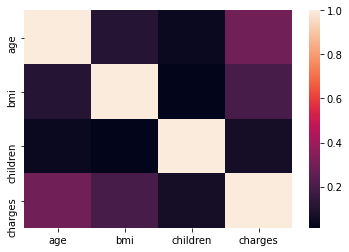

In [7]:
sns.heatmap(corr)

In [8]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   bmi_int   1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 94.1+ KB


<AxesSubplot:xlabel='charges', ylabel='Density'>

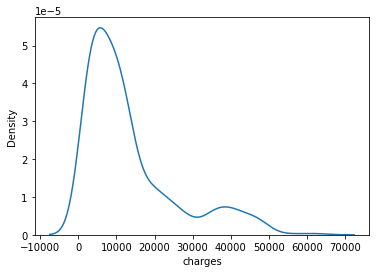

In [10]:
sns.kdeplot(df['charges'])

In [11]:
variables = ['sex','smoker','region','age','bmi_int','children']

In [12]:
df['bmi_int'].head()

0    27
1    33
2    33
3    22
4    28
Name: bmi_int, dtype: int64

Data distribution analysys


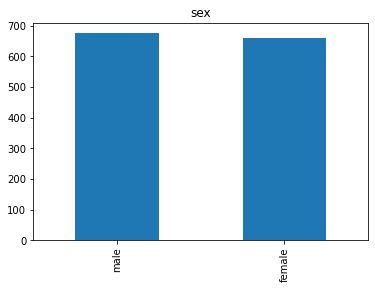

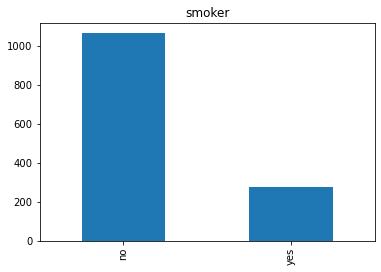

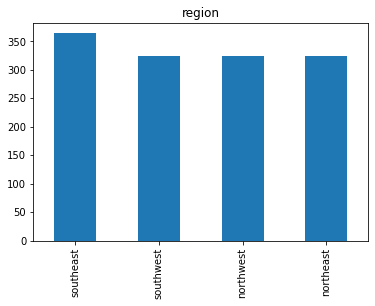

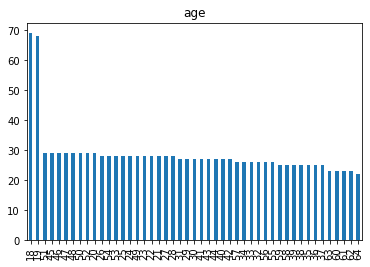

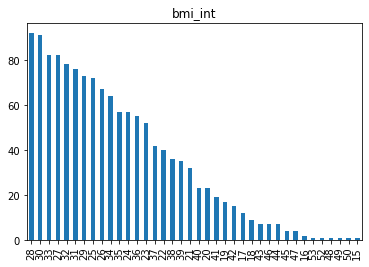

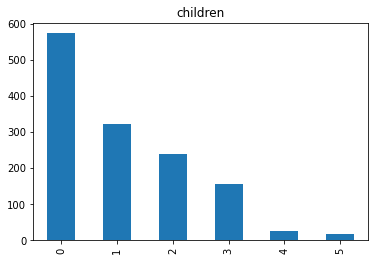

In [13]:
# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


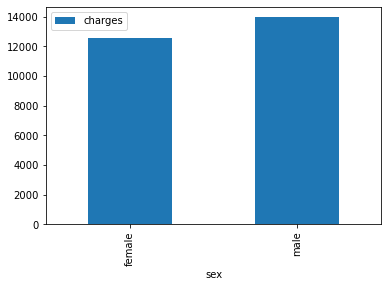

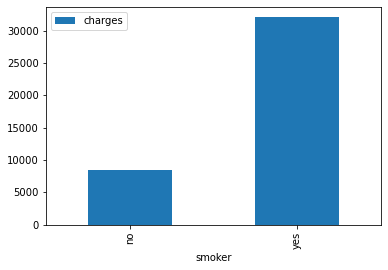

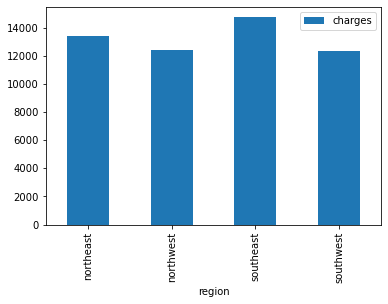

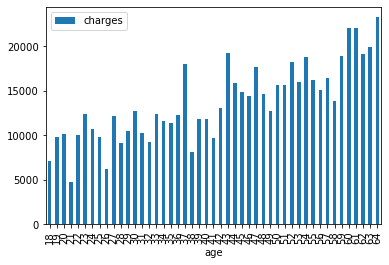

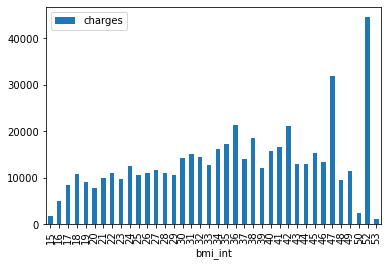

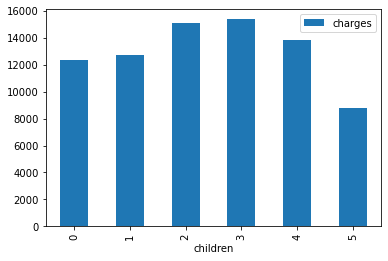

In [14]:
#average cost analysys
print('Mean cost analysys:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

Variables pairplot:


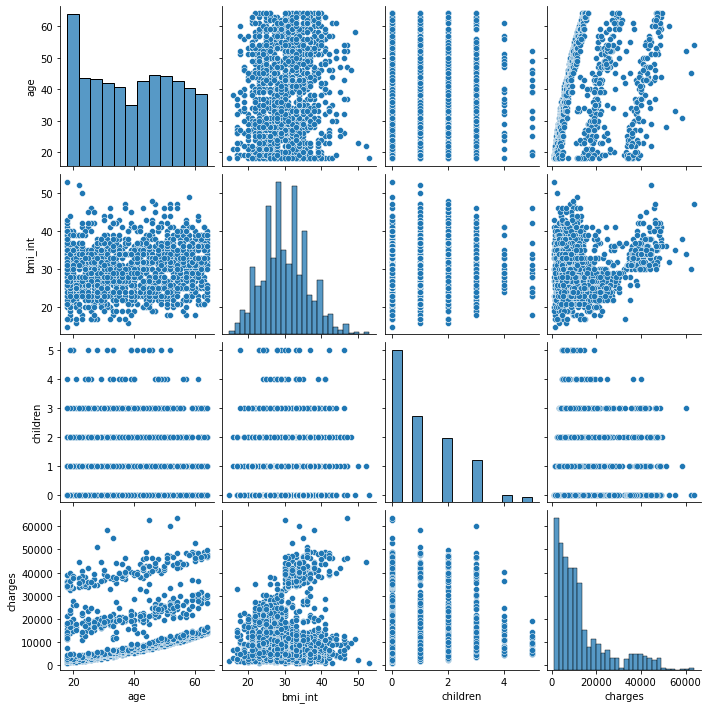

In [15]:
#variables pairplot
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [20]:
#transform categorical data
le_sex = LabelEncoder()   # used to transform non-numerical labels to numerical labels
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])


variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)
r2_score(y_test, y_test_pred)

0.8359267713821411

Feature importance ranking


1.smoker(0.626636)
2.bmi(0.186395)
3.age(0.130215)
4.children(0.023485)
5.region(0.022653)
6.sex(0.010616)


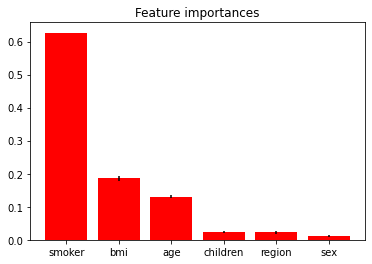

In [21]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

In [22]:
print('Predicting on new data\n\n')

billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

billy[0] = le_sex.fit_transform([billy[0]])[0]
billy[1] = le_smoker.fit_transform([billy[1]])[0] 
billy[2] = le_region.fit_transform([billy[2]])[0] 

X = sc.transform([billy])

cost_for_billy = regressor.predict(X)[0]
print('Cost for Billy = ',cost_for_billy,'\n\n')


dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.fit_transform([dennis[0]])[0] 
dennis[1] = le_smoker.fit_transform([dennis[1]])[0] 
dennis[2] = le_region.fit_transform([dennis[2]])[0] 

X = sc.transform([dennis])

cost_for_dennis = regressor.predict(X)[0]

print('Cost for Dennis = ',cost_for_dennis)

Predicting on new data


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Billy =  7837.578270450013 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Dennis =  9419.09286334999


In [23]:
import pickle
# open a file, where you ant to store the data
file = open('cost_pred.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)